<a href="https://colab.research.google.com/github/adityapanwar94/Data-Analysis-and-Process-Automation-DaPrA-/blob/drishti/Dataset_preprocessing%2C_analysis%2C_correlation_matrix(User_data_only%2C_no_computer_specs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/eYSIP_Data/Dataset26-06.zip

## **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
Grouped_data = pd.read_csv(r'/content/Dataset (26-06-22)/Dataset_grouped(25-06-22).csv')
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 160 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(156)
memory usage: 1.6 MB


In [5]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
count,1293.000000,1286.000000,1292.000000,1292.000000,1184.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.494606,2.898671,1.962461,63.363176,3.768755,0.008507,0.07966,0.096674,0.015468,...,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831,0.047177
std,560.509233,0.812837,3.185943,2.462263,55.176500,0.827104,0.133152,0.42811,0.593382,0.218514,...,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279,0.369212
min,1001.000000,2.870000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.117812,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.589417,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.011875,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
Grouped_data.columns.to_list()

['team_id',
 'cgpa',
 'onlineCourse',
 'completeCourse',
 'internetspeed<',
 'Discipline_0.0',
 'Discipline_1.0',
 'Discipline_2.0',
 'Discipline_3.0',
 'Discipline_4.0',
 'Discipline_5.0',
 'Discipline_7.0',
 'Year_1.0',
 'Year_2.0',
 'Year_3.0',
 'Year_4.0',
 'Year_6.0',
 'Gender_0.0',
 'Gender_1.0',
 'Gender_3.0',
 'elsiLab_0.0',
 'elsiLab_1.0',
 'elsiLab_2.0',
 'ssc_board_0.0',
 'ssc_board_1.0',
 'ssc_board_2.0',
 'ssc_board_3.0',
 'ssc_board_4.0',
 'ssc_board_6.0',
 'hsc_board_0.0',
 'hsc_board_1.0',
 'hsc_board_2.0',
 'hsc_board_3.0',
 'hsc_board_4.0',
 'hsc_board_6.0',
 'workstation_1.0',
 'workstation_2.0',
 'workstation_4.0',
 'sub_ros_0.0',
 'sub_ros_1.0',
 'sub_ros_2.0',
 'sub_ros_3.0',
 'sub_ros_4.0',
 'sub_ros_7.0',
 'sub_ip_0.0',
 'sub_ip_1.0',
 'sub_ip_2.0',
 'sub_ip_3.0',
 'sub_ip_4.0',
 'sub_ip_7.0',
 'sub_emb_c_0.0',
 'sub_emb_c_1.0',
 'sub_emb_c_2.0',
 'sub_emb_c_3.0',
 'sub_emb_c_4.0',
 'sub_emb_c_7.0',
 'sub_ml_0.0',
 'sub_ml_1.0',
 'sub_ml_2.0',
 'sub_ml_3.0',
 's

In [7]:
Grouped_data.isnull().sum()

team_id                      0
cgpa                         7
onlineCourse                 1
completeCourse               1
internetspeed<             109
                          ... 
Department_category_0.0      0
Department_category_1.0      0
Department_category_2.0      0
Department_category_3.0      0
Department_category_4.0      0
Length: 160, dtype: int64

In [8]:
def unique_chart(Dataset):
  uni_dict = {}
  uni_value ={}
  keys = Dataset.columns
  for i in keys:
    uni_dict[i] = Dataset[i].nunique()
    if Dataset[i].nunique() <= 10:
      uni_value[i] = Dataset[i].unique()
    else:
      uni_value[i] = None
  Unique = pd.DataFrame([uni_dict, uni_value]) 
  return (Unique)

In [9]:
Unique1 = unique_chart(Grouped_data)
print(Unique1.to_markdown())

|    |   team_id |   cgpa |   onlineCourse |   completeCourse | internetspeed<                       | Discipline_0.0   | Discipline_1.0   | Discipline_2.0   | Discipline_3.0   | Discipline_4.0   | Discipline_5.0   | Discipline_7.0   | Year_1.0    | Year_2.0    | Year_3.0    | Year_4.0    | Year_6.0   | Gender_0.0   | Gender_1.0   | Gender_3.0   | elsiLab_0.0   | elsiLab_1.0   | elsiLab_2.0   | ssc_board_0.0   | ssc_board_1.0   | ssc_board_2.0   | ssc_board_3.0   | ssc_board_4.0   | ssc_board_6.0   | hsc_board_0.0   | hsc_board_1.0   | hsc_board_2.0   | hsc_board_3.0   | hsc_board_4.0   | hsc_board_6.0   | workstation_1.0   | workstation_2.0   | workstation_4.0   | sub_ros_0.0   | sub_ros_1.0   | sub_ros_2.0   | sub_ros_3.0   | sub_ros_4.0   | sub_ros_7.0   | sub_ip_0.0   | sub_ip_1.0   | sub_ip_2.0   | sub_ip_3.0   | sub_ip_4.0   | sub_ip_7.0   | sub_emb_c_0.0   | sub_emb_c_1.0   | sub_emb_c_2.0   | sub_emb_c_3.0   | sub_emb_c_4.0   | sub_emb_c_7.0   | sub_ml_0.0   | sub_ml_1.0   | su

In [10]:
columns = ['internetspeed<', 'cgpa', 'onlineCourse', 'completeCourse']
def internet_null_replace(columns):
  for cols in columns:
    Grouped_data[cols] = Grouped_data[cols].fillna(0)
  return Grouped_data

Grouped_data = internet_null_replace(columns)

In [11]:
print(Grouped_data.isna().sum().sort_values(ascending=False).to_markdown())

|                         |   0 |
|:------------------------|----:|
| team_id                 |   0 |
| cgpa                    |   0 |
| preference1_4.0         |   0 |
| preference1_5.0         |   0 |
| preference1_7.0         |   0 |
| preference2_0.0         |   0 |
| preference2_1.0         |   0 |
| preference2_2.0         |   0 |
| preference2_3.0         |   0 |
| preference2_4.0         |   0 |
| preference2_5.0         |   0 |
| preference2_7.0         |   0 |
| preference3_0.0         |   0 |
| preference3_1.0         |   0 |
| preference3_2.0         |   0 |
| preference3_3.0         |   0 |
| preference3_4.0         |   0 |
| preference3_5.0         |   0 |
| preference3_7.0         |   0 |
| preference1_3.0         |   0 |
| preference1_2.0         |   0 |
| preference1_1.0         |   0 |
| sub_mm_3.0              |   0 |
| sub_fpga_2.0            |   0 |
| sub_fpga_3.0            |   0 |
| sub_fpga_4.0            |   0 |
| sub_fpga_7.0            |   0 |
| sub_mm_0.0  

In [12]:
Grouped_data.shape

(1293, 160)

In [13]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.448618,2.896429,1.960944,58.021655,3.768755,0.008507,0.07966,0.096674,0.015468,...,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831,0.047177
std,560.509233,1.022721,3.185730,2.461915,55.657562,0.827104,0.133152,0.42811,0.593382,0.218514,...,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279,0.369212
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.114275,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.577250,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.007500,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## **Creating Dictionary:**

```
# Participation_Freq = {'none' : 0,
                      'null' : 0,
                      'eyrc_19' : 1,
                      'eyrc_19, eyrc_20' : 2,
                      'eyrc_19, eyrc_20, eyrc_21' : 3
    
}
```
```
# Internet_option_freq = [0, 1, 2, 3, 4, 5]
    
preferences = {'Strawberry Stacker (SS)' : 0 , 
               'Agribot (AB)' : 1, 
               'Functional Weeder (FW)' : 2,  
               'Berryminator (BM)' : 3, 
               'Soil Monitoring Bot (SM)' : 4, 
               'Dairy Bike (DB)' : 5
               'Null' : 7
}

Department_category = { 'Electronics' : 0,
                        'Computers' : 1, 
                        'Mechanical', : 2,
                        'Others' : 3,
                        }
```
```
Discipline ={'BE/BTech/B.Dec': 0, 
             'ME/MTech': 1, 
             'Dual Degree B.Tech & M.Tech' : 2, 
             'BSc/BCA/B.Voc/B.Com' : 3,
             'Diploma' : 4,
             'MSc/MCA' : 5,
             'Null' : 7}
```
```
# Gender = {'Male' : 0,
          'Female' : 1,
          'Null' : 3}
```

## **Data Analysis**

In [14]:
Grouped_data

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
0,1001,8.437500,2.75,1.00,1.0,4,0,0,0,0,...,0,3,1,0,0,4,0,0,0,0
1,1002,8.443500,5.75,4.50,50.0,4,0,0,0,0,...,3,0,1,0,0,3,1,0,0,0
2,1004,8.852500,6.00,5.50,150.0,4,0,0,0,0,...,4,0,0,0,0,1,0,3,0,0
3,1005,8.650000,5.75,4.00,200.0,4,0,0,0,0,...,4,0,0,0,0,0,0,3,1,0
4,1006,7.549675,0.50,0.50,100.0,3,1,0,0,0,...,0,4,0,0,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2964,9.070500,3.75,3.00,150.0,4,0,0,0,0,...,3,1,0,0,0,1,2,1,0,0
1289,2965,8.760000,9.00,6.00,150.0,4,0,0,0,0,...,2,1,1,0,0,0,3,1,0,0
1290,2968,8.675000,6.25,4.75,0.0,4,0,0,0,0,...,4,0,0,0,0,4,0,0,0,0
1291,2970,8.475000,1.00,1.00,0.0,4,0,0,0,0,...,4,0,0,0,0,4,0,0,0,0


In [15]:
Discipline_datfrm = pd.DataFrame([])
columns = ['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Discipline_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Discipline_datfrm,Discipline_analysis], axis = 1)
  Discipline_datfrm = temp

In [16]:
Discipline_datfrm.head()

,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,Discipline_5.0,Discipline_7.0
0,48,1285.0,1235,1255.0,1284.0,1279.0,1287.0
1,7,7.0,32,8.0,5.0,8.0,4.0
2,18,NaN,14,NaN,NaN,NaN,NaN
3,50,NaN,5,3.0,1.0,3.0,1.0
4,1170,1.0,7,27.0,3.0,3.0,1.0


In [17]:
fig = px.bar(Discipline_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
A single Discipline that is BE/BTech/B.Dec, thus, we can drop the discipline columns as a whole.

In [18]:
Grouped_data = Grouped_data.drop(['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0'], axis=1)

In [19]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 153 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(149)
memory usage: 1.5 MB


In [20]:
Department_datfrm = pd.DataFrame([])
columns = ['Department_category_0.0','Department_category_1.0','Department_category_2.0', 'Department_category_3.0', 'Department_category_4.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Department_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Department_datfrm,Department_analysis], axis = 1)
  Department_datfrm = temp

In [21]:
Department_datfrm.head()

,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Department_category_4.0
0,418,778,902,1125,1264
1,139,191,141,96,16
2,143,101,71,37,2
3,146,59,57,18,3
4,447,164,122,17,8


In [22]:
fig = px.bar(Department_datfrm, barmode='group',
             height=400)
fig.show()

In [23]:
Grouped_data = Grouped_data.drop(['Department_category_4.0'], axis=1)

In [24]:
Preference1_datfrm = pd.DataFrame([])
columns = ['preference1_0.0','preference1_1.0','preference1_2.0', 'preference1_3.0', 'preference1_4.0', 'preference1_5.0', 'preference1_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference1_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference1_datfrm,Preference1_analysis], axis = 1)
  Preference1_datfrm = temp

In [25]:
Preference1_datfrm.head()

,preference1_0.0,preference1_1.0,preference1_2.0,preference1_3.0,preference1_4.0,preference1_5.0,preference1_7.0
0,1072,996,1177,972,1084,1177,1280
4,221,297,116,321,209,116,13


In [26]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

In [27]:
Preference2_datfrm = pd.DataFrame([])
columns = ['preference2_0.0','preference2_1.0','preference2_2.0', 'preference2_3.0', 'preference2_4.0', 'preference2_5.0', 'preference2_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference2_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference2_datfrm,Preference2_analysis], axis = 1)
  Preference2_datfrm = temp

In [28]:
Preference2_datfrm.head()

,preference2_0.0,preference2_1.0,preference2_2.0,preference2_3.0,preference2_4.0,preference2_5.0,preference2_7.0
0,1034,1056,1146,1015,1113,1114,1280
4,259,237,147,278,180,179,13


In [29]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
As we can observe only 13 teams have no preference at all. So, we can effectively drop the no preference column that is preference_7.0

In [30]:
Grouped_data = Grouped_data.drop(['preference1_7.0', 'preference2_7.0', 'preference3_7.0', 'preference4_7.0', 'preference5_7.0','preference6_7.0'], axis=1)

In [31]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 146 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(142)
memory usage: 1.4 MB


In [32]:
Year_datfrm = pd.DataFrame([])
columns = ['Year_1.0', 'Year_2.0', 'Year_3.0', 'Year_4.0', 'Year_6.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Year_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Year_datfrm,Year_analysis], axis = 1)
  Year_datfrm = temp

In [33]:
Year_datfrm.head()

,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Year_6.0
0,1155,605,712,1121,1287.0
1,49,69,67,36,4.0
2,18,58,66,22,NaN
3,7,75,67,15,1.0
4,64,486,381,99,1.0


In [34]:
fig = px.bar(Year_datfrm, barmode='group',
             height=400)
fig.show()

In [35]:
Grouped_data = Grouped_data.drop(['Year_6.0'], axis=1)

In [36]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 145 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(141)
memory usage: 1.4 MB


In [37]:
subros_datfrm = pd.DataFrame([])
columns = ['sub_ros_0.0','sub_ros_1.0','sub_ros_2.0','sub_ros_3.0','sub_ros_4.0','sub_ros_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subros_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subros_datfrm,subros_analysis], axis = 1)
  subros_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subros_datfrm, barmode='group',
             height=400)
fig.show()

In [38]:
subip_datfrm = pd.DataFrame([])
columns = ['sub_ip_0.0','sub_ip_1.0','sub_ip_2.0','sub_ip_3.0','sub_ip_4.0','sub_ip_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subip_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subip_datfrm,subip_analysis], axis = 1)
  subip_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subip_datfrm, barmode='group',
             height=400)
fig.show()

In [39]:
Grouped_data = Grouped_data.drop(['sub_ros_7.0','sub_mss_7.0','sub_cs_7.0','sub_ap_7.0','sub_ml_7.0','sub_emb_c_7.0','sub_de_7.0','sub_fpga_7.0','sub_mm_7.0'], axis=1)

In [40]:
Grouped_data = Grouped_data.drop(['sub_ip_7.0'], axis=1)

In [41]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 135 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(131)
memory usage: 1.3 MB


In [42]:
Grouped_data = Grouped_data.drop(['ssc_board_6.0','hsc_board_6.0'], axis=1)

In [43]:
Grouped_data = Grouped_data.drop(['workstation_4.0'], axis=1)

In [44]:
wrkstn_datfrm = pd.DataFrame([])
columns = ['workstation_1.0','workstation_2.0']
for cols in columns:
  temp =  pd.DataFrame([])
  wrkstn_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([wrkstn_datfrm,wrkstn_analysis], axis = 1)
  wrkstn_datfrm = temp

wrkstn_datfrm.head()
fig = px.bar(wrkstn_datfrm, barmode='group',
             height=400)
fig.show()

In [45]:
prtfrq_datfrm = pd.DataFrame([])
columns = ['Participation_Freq_0','Participation_Freq_1', 'Participation_Freq_2', 'Participation_Freq_3' ]
for cols in columns:
  temp =  pd.DataFrame([])
  prtfrq_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([prtfrq_datfrm,prtfrq_analysis], axis = 1)
  prtfrq_datfrm = temp

prtfrq_datfrm.head()
fig = px.bar(prtfrq_datfrm, barmode='group',
             height=400)
fig.show()

In [46]:
IntOpt_datfrm = pd.DataFrame([])
columns = ['country_0','country_1','country_2']
for cols in columns:
  temp =  pd.DataFrame([])
  IntOpt_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([IntOpt_datfrm,IntOpt_analysis], axis = 1)
  IntOpt_datfrm = temp

IntOpt_datfrm.head()
fig = px.bar(IntOpt_datfrm, barmode='group',
             height=400)
fig.show()

In [47]:
Grouped_data = Grouped_data.drop(['country_0','country_1','country_2'], axis=1)

In [48]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 129 entries, team_id to Department_category_3.0
dtypes: float64(4), int64(125)
memory usage: 1.3 MB


In [49]:
Grouped_data.columns.to_list()

['team_id',
 'cgpa',
 'onlineCourse',
 'completeCourse',
 'internetspeed<',
 'Year_1.0',
 'Year_2.0',
 'Year_3.0',
 'Year_4.0',
 'Gender_0.0',
 'Gender_1.0',
 'Gender_3.0',
 'elsiLab_0.0',
 'elsiLab_1.0',
 'elsiLab_2.0',
 'ssc_board_0.0',
 'ssc_board_1.0',
 'ssc_board_2.0',
 'ssc_board_3.0',
 'ssc_board_4.0',
 'hsc_board_0.0',
 'hsc_board_1.0',
 'hsc_board_2.0',
 'hsc_board_3.0',
 'hsc_board_4.0',
 'workstation_1.0',
 'workstation_2.0',
 'sub_ros_0.0',
 'sub_ros_1.0',
 'sub_ros_2.0',
 'sub_ros_3.0',
 'sub_ros_4.0',
 'sub_ip_0.0',
 'sub_ip_1.0',
 'sub_ip_2.0',
 'sub_ip_3.0',
 'sub_ip_4.0',
 'sub_emb_c_0.0',
 'sub_emb_c_1.0',
 'sub_emb_c_2.0',
 'sub_emb_c_3.0',
 'sub_emb_c_4.0',
 'sub_ml_0.0',
 'sub_ml_1.0',
 'sub_ml_2.0',
 'sub_ml_3.0',
 'sub_ml_4.0',
 'sub_ap_0.0',
 'sub_ap_1.0',
 'sub_ap_2.0',
 'sub_ap_3.0',
 'sub_ap_4.0',
 'sub_cs_0.0',
 'sub_cs_1.0',
 'sub_cs_2.0',
 'sub_cs_3.0',
 'sub_cs_4.0',
 'sub_mss_0.0',
 'sub_mss_1.0',
 'sub_mss_2.0',
 'sub_mss_3.0',
 'sub_mss_4.0',
 'sub_fpg

In [50]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,8.448618,2.896429,1.960944,58.021655,0.279969,1.820572,1.488012,0.402939,2.948183,...,0.013921,2.730085,0.788863,0.359629,0.094354,0.013148,2.050271,0.948183,0.728538,0.225831
std,560.509233,1.022721,3.185730,2.461915,55.657562,0.925495,1.859286,1.795907,1.124271,1.237172,...,0.188175,1.227522,0.969887,0.735948,0.377880,0.120552,1.701787,1.415179,1.306010,0.688279
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.114275,1.000000,0.500000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.577250,2.000000,1.250000,50.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,2457.000000,9.007500,4.000000,2.750000,100.000000,0.000000,4.000000,4.000000,0.000000,4.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000
max,2971.000000,10.000000,29.250000,28.500000,200.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000


In [51]:
Grouped_data[Grouped_data['cgpa']<100]

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0
0,1001,8.437500,2.75,1.00,1.0,0,0,4,0,4,...,0,0,3,1,0,0,4,0,0,0
1,1002,8.443500,5.75,4.50,50.0,0,0,4,0,4,...,0,3,0,1,0,0,3,1,0,0
2,1004,8.852500,6.00,5.50,150.0,0,1,3,0,4,...,0,4,0,0,0,0,1,0,3,0
3,1005,8.650000,5.75,4.00,200.0,0,0,0,4,4,...,0,4,0,0,0,0,0,0,3,1
4,1006,7.549675,0.50,0.50,100.0,0,4,0,0,4,...,0,0,4,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2964,9.070500,3.75,3.00,150.0,2,2,0,0,2,...,0,3,1,0,0,0,1,2,1,0
1289,2965,8.760000,9.00,6.00,150.0,2,1,1,0,3,...,0,2,1,1,0,0,0,3,1,0
1290,2968,8.675000,6.25,4.75,0.0,0,4,0,0,4,...,0,4,0,0,0,0,4,0,0,0
1291,2970,8.475000,1.00,1.00,0.0,0,4,0,0,0,...,0,4,0,0,0,0,4,0,0,0


## **Adding computer specification to the dataset**

In [52]:
computer_specs = pd.read_csv(r'/content/drive/MyDrive/eYSIP_Data/System_Specification.csv')

In [53]:
computer_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_id                1293 non-null   int64  
 1   Ram_Avg                1293 non-null   float64
 2   SingleCore_Avg         1293 non-null   float64
 3   MultiCore_Avg          1293 non-null   float64
 4   GeekBench(OpenCL)_Avg  1293 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 50.6 KB


In [54]:
computer_specs.head()

,team_id,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,1001,5.5,780.50,1771.50,2278.75
1,1002,6.0,653.75,1852.75,5701.25
2,1004,8.0,902.00,3266.75,22795.75
3,1005,12.0,785.00,3711.75,33491.50
4,1006,10.0,801.00,2969.50,37489.50


In [55]:
complete_dataset = pd.merge(Grouped_data,computer_specs,how='left', on = 'team_id')

In [56]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1292
Columns: 133 entries, team_id to GeekBench(OpenCL)_Avg
dtypes: float64(8), int64(125)
memory usage: 1.3 MB


In [57]:
print(complete_dataset.isna().sum().sort_values(ascending=False).to_markdown())

|                         |   0 |
|:------------------------|----:|
| team_id                 |   0 |
| preference2_1.0         |   0 |
| preference4_3.0         |   0 |
| preference4_2.0         |   0 |
| preference4_1.0         |   0 |
| preference4_0.0         |   0 |
| preference3_5.0         |   0 |
| preference3_4.0         |   0 |
| preference3_3.0         |   0 |
| preference3_2.0         |   0 |
| preference3_1.0         |   0 |
| preference3_0.0         |   0 |
| preference2_5.0         |   0 |
| preference2_4.0         |   0 |
| preference2_3.0         |   0 |
| preference2_2.0         |   0 |
| preference2_0.0         |   0 |
| sub_mm_0.0              |   0 |
| preference1_5.0         |   0 |
| preference1_4.0         |   0 |
| preference1_3.0         |   0 |
| preference1_2.0         |   0 |
| preference1_1.0         |   0 |
| preference1_0.0         |   0 |
| sub_de_4.0              |   0 |
| sub_de_3.0              |   0 |
| sub_de_2.0              |   0 |
| sub_de_1.0  

In [58]:
complete_dataset.to_csv('Refine_data(07-07-22).csv', index=True)

In [59]:
complete_dataset.head()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,...,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,1001,8.437500,2.75,1.0,1.0,0,0,4,0,4,...,0,0,4,0,0,0,5.5,780.50,1771.50,2278.75
1,1002,8.443500,5.75,4.5,50.0,0,0,4,0,4,...,0,0,3,1,0,0,6.0,653.75,1852.75,5701.25
2,1004,8.852500,6.00,5.5,150.0,0,1,3,0,4,...,0,0,1,0,3,0,8.0,902.00,3266.75,22795.75
3,1005,8.650000,5.75,4.0,200.0,0,0,0,4,4,...,0,0,0,0,3,1,12.0,785.00,3711.75,33491.50
4,1006,7.549675,0.50,0.5,100.0,0,4,0,0,4,...,0,0,3,1,0,0,10.0,801.00,2969.50,37489.50


## **Normalizing the Dataset**

In [60]:
Grouped_dataC = complete_dataset.copy()

In [61]:
scaler = MinMaxScaler()
data_columns = Grouped_dataC.drop(['team_id'], axis=1).columns
data_columns

Index(['cgpa', 'onlineCourse', 'completeCourse', 'internetspeed<', 'Year_1.0',
       'Year_2.0', 'Year_3.0', 'Year_4.0', 'Gender_0.0', 'Gender_1.0',
       ...
       'Internet_option_freq_4', 'Internet_option_freq_5',
       'Department_category_0.0', 'Department_category_1.0',
       'Department_category_2.0', 'Department_category_3.0', 'Ram_Avg',
       'SingleCore_Avg', 'MultiCore_Avg', 'GeekBench(OpenCL)_Avg'],
      dtype='object', length=132)

In [62]:
data_scaled = pd.DataFrame(scaler.fit_transform(Grouped_dataC.drop(['team_id'], axis=1)), columns=data_columns)
data_scaled.head()

,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,Gender_1.0,...,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,0.843750,0.094017,0.035088,0.005,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,1.00,0.00,0.00,0.00,0.34375,0.555318,0.314919,0.039257
1,0.844350,0.196581,0.157895,0.250,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,0.75,0.25,0.00,0.00,0.37500,0.465137,0.329363,0.098217
2,0.885250,0.205128,0.192982,0.750,0.0,0.25,0.75,0.0,1.0,0.0,...,0.0,0.0,0.25,0.00,0.75,0.00,0.50000,0.641764,0.580730,0.392709
3,0.865000,0.196581,0.140351,1.000,0.0,0.00,0.00,1.0,1.0,0.0,...,0.0,0.0,0.00,0.00,0.75,0.25,0.75000,0.558520,0.659837,0.576967
4,0.754968,0.017094,0.017544,0.500,0.0,1.00,0.00,0.0,1.0,0.0,...,0.0,0.0,0.75,0.25,0.00,0.00,0.62500,0.569904,0.527888,0.645842


## **Correlation matrix**

In [ ]:
corr1 = Grouped_data['cgpa'].corr(Grouped_data['onlineCourse'],method='pearson', min_periods=1)
print(corr1)

0.05841090803112236


In [ ]:
corrMatrix = data_scaled.corr()
print(corrMatrix.to_markdown())

|                         |         cgpa |   onlineCourse |   completeCourse |   internetspeed< |     Year_1.0 |     Year_2.0 |    Year_3.0 |     Year_4.0 |   Gender_0.0 |   Gender_1.0 |   Gender_3.0 |   elsiLab_0.0 |   elsiLab_1.0 |   elsiLab_2.0 |   ssc_board_0.0 |   ssc_board_1.0 |   ssc_board_2.0 |   ssc_board_3.0 |   ssc_board_4.0 |   hsc_board_0.0 |   hsc_board_1.0 |   hsc_board_2.0 |   hsc_board_3.0 |   hsc_board_4.0 |   workstation_1.0 |   workstation_2.0 |   sub_ros_0.0 |   sub_ros_1.0 |   sub_ros_2.0 |   sub_ros_3.0 |   sub_ros_4.0 |   sub_ip_0.0 |   sub_ip_1.0 |   sub_ip_2.0 |   sub_ip_3.0 |   sub_ip_4.0 |   sub_emb_c_0.0 |   sub_emb_c_1.0 |   sub_emb_c_2.0 |   sub_emb_c_3.0 |   sub_emb_c_4.0 |   sub_ml_0.0 |   sub_ml_1.0 |   sub_ml_2.0 |   sub_ml_3.0 |   sub_ml_4.0 |   sub_ap_0.0 |   sub_ap_1.0 |   sub_ap_2.0 |   sub_ap_3.0 |   sub_ap_4.0 |   sub_cs_0.0 |   sub_cs_1.0 |   sub_cs_2.0 |   sub_cs_3.0 |   sub_cs_4.0 |   sub_mss_0.0 |   sub_mss_1.0 |   sub_mss_2.0 |   sub_mss_3.

## **Principal Component Analysis**

In [63]:
new_list = data_scaled.columns.to_list()
print(', '.join(new_list))

cgpa, onlineCourse, completeCourse, internetspeed<, Year_1.0, Year_2.0, Year_3.0, Year_4.0, Gender_0.0, Gender_1.0, Gender_3.0, elsiLab_0.0, elsiLab_1.0, elsiLab_2.0, ssc_board_0.0, ssc_board_1.0, ssc_board_2.0, ssc_board_3.0, ssc_board_4.0, hsc_board_0.0, hsc_board_1.0, hsc_board_2.0, hsc_board_3.0, hsc_board_4.0, workstation_1.0, workstation_2.0, sub_ros_0.0, sub_ros_1.0, sub_ros_2.0, sub_ros_3.0, sub_ros_4.0, sub_ip_0.0, sub_ip_1.0, sub_ip_2.0, sub_ip_3.0, sub_ip_4.0, sub_emb_c_0.0, sub_emb_c_1.0, sub_emb_c_2.0, sub_emb_c_3.0, sub_emb_c_4.0, sub_ml_0.0, sub_ml_1.0, sub_ml_2.0, sub_ml_3.0, sub_ml_4.0, sub_ap_0.0, sub_ap_1.0, sub_ap_2.0, sub_ap_3.0, sub_ap_4.0, sub_cs_0.0, sub_cs_1.0, sub_cs_2.0, sub_cs_3.0, sub_cs_4.0, sub_mss_0.0, sub_mss_1.0, sub_mss_2.0, sub_mss_3.0, sub_mss_4.0, sub_fpga_0.0, sub_fpga_1.0, sub_fpga_2.0, sub_fpga_3.0, sub_fpga_4.0, sub_mm_0.0, sub_mm_1.0, sub_mm_2.0, sub_mm_3.0, sub_mm_4.0, sub_de_0.0, sub_de_1.0, sub_de_2.0, sub_de_3.0, sub_de_4.0, preference1_0.

## some separation

In [64]:
usefulcoldata = data_scaled.drop(['Gender_0.0', 'Gender_1.0', 'Gender_3.0', 'elsiLab_0.0', 'elsiLab_1.0', 'elsiLab_2.0', 
                                                          'ssc_board_0.0', 'ssc_board_1.0', 'ssc_board_2.0', 'ssc_board_3.0', 'ssc_board_4.0', 
                                                          'hsc_board_0.0', 'hsc_board_1.0', 'hsc_board_2.0', 'hsc_board_3.0', 'hsc_board_4.0', 
                                                         'workstation_1.0', 'workstation_2.0', 'Internet_option_freq_0', 
                                                          'Internet_option_freq_1', 'Internet_option_freq_2', 'Internet_option_freq_3', 
                                                          'Internet_option_freq_4', 'Internet_option_freq_5', 'IS_eLSI_0', 'IS_eLSI_1','onlineCourse',
       'cgpa', 'completeCourse', 'internetspeed<',
       'preference1_0.0', 'preference1_1.0', 'preference1_2.0',
       'preference1_3.0', 'preference1_4.0', 'preference1_5.0',
       'preference2_0.0', 'preference2_1.0', 'preference2_2.0',
       'preference2_3.0', 'preference2_4.0', 'preference2_5.0',
       'preference3_0.0', 'preference3_1.0', 'preference3_2.0',
       'preference3_3.0', 'preference3_4.0', 'preference3_5.0',
       'preference5_0.0', 'preference5_1.0', 'preference5_2.0',
       'preference5_3.0', 'preference5_4.0', 'preference5_5.0',
       'preference6_0.0', 'preference6_1.0', 'preference6_2.0',
       'preference6_3.0', 'preference6_4.0', 'preference6_5.0',
       'preference4_0.0', 'preference4_1.0', 'preference4_2.0',
       'preference4_3.0', 'preference4_4.0', 'preference4_5.0', 'Year_1.0', 'Year_2.0',
       'Year_3.0', 'Year_4.0'], axis=1)

In [65]:
usefulcoldata.columns

Index(['sub_ros_0.0', 'sub_ros_1.0', 'sub_ros_2.0', 'sub_ros_3.0',
       'sub_ros_4.0', 'sub_ip_0.0', 'sub_ip_1.0', 'sub_ip_2.0', 'sub_ip_3.0',
       'sub_ip_4.0', 'sub_emb_c_0.0', 'sub_emb_c_1.0', 'sub_emb_c_2.0',
       'sub_emb_c_3.0', 'sub_emb_c_4.0', 'sub_ml_0.0', 'sub_ml_1.0',
       'sub_ml_2.0', 'sub_ml_3.0', 'sub_ml_4.0', 'sub_ap_0.0', 'sub_ap_1.0',
       'sub_ap_2.0', 'sub_ap_3.0', 'sub_ap_4.0', 'sub_cs_0.0', 'sub_cs_1.0',
       'sub_cs_2.0', 'sub_cs_3.0', 'sub_cs_4.0', 'sub_mss_0.0', 'sub_mss_1.0',
       'sub_mss_2.0', 'sub_mss_3.0', 'sub_mss_4.0', 'sub_fpga_0.0',
       'sub_fpga_1.0', 'sub_fpga_2.0', 'sub_fpga_3.0', 'sub_fpga_4.0',
       'sub_mm_0.0', 'sub_mm_1.0', 'sub_mm_2.0', 'sub_mm_3.0', 'sub_mm_4.0',
       'sub_de_0.0', 'sub_de_1.0', 'sub_de_2.0', 'sub_de_3.0', 'sub_de_4.0',
       'Participation_Freq_0', 'Participation_Freq_1', 'Participation_Freq_2',
       'Participation_Freq_3', 'Department_category_0.0',
       'Department_category_1.0', 'Department_categ

In [66]:
usefulcoldata['Ram_Avg'] = usefulcoldata['Ram_Avg'].apply(lambda x: x*100)
usefulcoldata['GeekBench(OpenCL)_Avg'] = usefulcoldata['GeekBench(OpenCL)_Avg'].apply(lambda x: x*100)
# usefulcoldata['SingleCore_Avg'] = usefulcoldata['SingleCore_Avg'].apply(lambda x: x*100)
# usefulcoldata['MultiCore_Avg'] = usefulcoldata['MultiCore_Avg'].apply(lambda x: x*100)

usefulcoldata['Department_category_0.0'] = usefulcoldata['Department_category_0.0'].apply(lambda x: x*100)
usefulcoldata['Department_category_1.0'] = usefulcoldata['Department_category_1.0'].apply(lambda x: x*100)
usefulcoldata['Department_category_2.0'] = usefulcoldata['Department_category_2.0'].apply(lambda x: x*100)
usefulcoldata['Department_category_3.0'] = usefulcoldata['Department_category_3.0'].apply(lambda x: x*0)

usefulcoldata['Participation_Freq_1'] = usefulcoldata['Participation_Freq_1'].apply(lambda x: x*60)
usefulcoldata['Participation_Freq_2'] = usefulcoldata['Participation_Freq_2'].apply(lambda x: x*80)
usefulcoldata['Participation_Freq_3'] = usefulcoldata['Participation_Freq_3'].apply(lambda x: x*100)
usefulcoldata['Participation_Freq_0'] = usefulcoldata['Participation_Freq_0'].apply(lambda x: x*0)

# usefulcoldata['sub_ros_0.0'] = usefulcoldata['sub_ros_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_1.0'] = usefulcoldata['sub_ros_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_2.0'] = usefulcoldata['sub_ros_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_3.0'] = usefulcoldata['sub_ros_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ros_4.0'] = usefulcoldata['sub_ros_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ip_0.0'] = usefulcoldata['sub_ip_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_1.0'] = usefulcoldata['sub_ip_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_2.0'] = usefulcoldata['sub_ip_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_3.0'] = usefulcoldata['sub_ip_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ip_4.0'] = usefulcoldata['sub_ip_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_emb_c_0.0'] = usefulcoldata['sub_emb_c_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_1.0'] = usefulcoldata['sub_emb_c_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_2.0'] = usefulcoldata['sub_emb_c_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_3.0'] = usefulcoldata['sub_emb_c_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_emb_c_4.0'] = usefulcoldata['sub_emb_c_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ml_0.0'] = usefulcoldata['sub_ml_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_1.0'] = usefulcoldata['sub_ml_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_2.0'] = usefulcoldata['sub_ml_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_3.0'] = usefulcoldata['sub_ml_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ml_4.0'] = usefulcoldata['sub_ml_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_ap_0.0'] = usefulcoldata['sub_ap_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_1.0'] = usefulcoldata['sub_ap_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_2.0'] = usefulcoldata['sub_ap_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_3.0'] = usefulcoldata['sub_ap_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_ap_4.0'] = usefulcoldata['sub_ap_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_cs_0.0'] = usefulcoldata['sub_cs_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_1.0'] = usefulcoldata['sub_cs_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_2.0'] = usefulcoldata['sub_cs_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_3.0'] = usefulcoldata['sub_cs_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_cs_4.0'] = usefulcoldata['sub_cs_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_mss_0.0'] = usefulcoldata['sub_mss_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_1.0'] = usefulcoldata['sub_mss_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_2.0'] = usefulcoldata['sub_mss_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_3.0'] = usefulcoldata['sub_mss_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mss_4.0'] = usefulcoldata['sub_mss_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_fpga_0.0'] = usefulcoldata['sub_fpga_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_1.0'] = usefulcoldata['sub_fpga_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_2.0'] = usefulcoldata['sub_fpga_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_3.0'] = usefulcoldata['sub_fpga_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_fpga_4.0'] = usefulcoldata['sub_fpga_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_mm_0.0'] = usefulcoldata['sub_mm_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_1.0'] = usefulcoldata['sub_mm_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_2.0'] = usefulcoldata['sub_mm_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_3.0'] = usefulcoldata['sub_mm_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_mm_4.0'] = usefulcoldata['sub_mm_4.0'].apply(lambda x: x*10)

# usefulcoldata['sub_de_0.0'] = usefulcoldata['sub_de_0.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_1.0'] = usefulcoldata['sub_de_1.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_2.0'] = usefulcoldata['sub_de_2.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_3.0'] = usefulcoldata['sub_de_3.0'].apply(lambda x: x*10)
# usefulcoldata['sub_de_4.0'] = usefulcoldata['sub_de_4.0'].apply(lambda x: x*10)


# usefulcoldata['preference1_0.0'] = usefulcoldata['preference1_0.0'].apply(lambda x: x*10)
# usefulcoldata['preference1_1.0'] = usefulcoldata['preference1_1.0'].apply(lambda x: x*10)
# usefulcoldata['preference1_2.0'] = usefulcoldata['preference1_2.0'].apply(lambda x: x*10)
# usefulcoldata['preference1_3.0'] = usefulcoldata['preference1_3.0'].apply(lambda x: x*10)
# usefulcoldata['preference1_4.0'] = usefulcoldata['preference1_4.0'].apply(lambda x: x*10)
# usefulcoldata['preference1_5.0'] = usefulcoldata['preference1_5.0'].apply(lambda x: x*10)

# usefulcoldata['preference2_0.0'] = usefulcoldata['preference2_0.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_1.0'] = usefulcoldata['preference2_1.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_2.0'] = usefulcoldata['preference2_2.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_3.0'] = usefulcoldata['preference2_3.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_4.0'] = usefulcoldata['preference2_4.0'].apply(lambda x: x*5)
# usefulcoldata['preference2_5.0'] = usefulcoldata['preference2_5.0'].apply(lambda x: x*5)



In [67]:
usefulcoldata.head()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Participation_Freq_2,Participation_Freq_3,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg
0,0.50,0.50,0.00,0.00,0.000000,1.00,0.00,0.00,0.00,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,34.375,0.555318,0.314919,3.925664
1,0.25,0.75,0.00,0.00,0.000000,0.50,0.00,0.25,0.25,0.0,...,20.0,0.0,75.0,25.0,0.0,0.0,37.500,0.465137,0.329363,9.821698
2,0.25,0.25,0.00,0.25,0.333333,0.00,0.00,0.25,0.75,0.0,...,0.0,0.0,25.0,0.0,75.0,0.0,50.000,0.641764,0.580730,39.270856
3,0.00,0.50,0.25,0.25,0.000000,0.00,0.25,0.75,0.00,0.0,...,0.0,0.0,0.0,0.0,75.0,0.0,75.000,0.558520,0.659837,57.696714
4,1.00,0.00,0.00,0.00,0.000000,0.75,0.25,0.00,0.00,0.0,...,0.0,0.0,75.0,25.0,0.0,0.0,62.500,0.569904,0.527888,64.584177


In [68]:
pca = PCA(n_components=0.80,svd_solver='auto')
principalComponents = pca.fit_transform(usefulcoldata)
principalDf = pd.DataFrame(data = principalComponents)

In [69]:
principalDf.head()

,0,1,2
0,-57.901376,-2.852822,0.006671
1,-25.248055,-15.970320,7.071672
2,29.457473,63.589552,15.355415
3,51.635386,70.751658,44.740212
4,-21.747349,-8.195079,53.547616


In [70]:
pca.explained_variance_ratio_.cumsum()*100

array([50.35783774, 79.3491938 , 90.63031662])

Text(0, 0.5, 'Explained variance (%)')

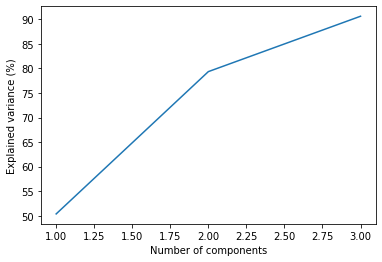

In [71]:
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


In [72]:
pca_components = abs(pca.components_)
# print(pca_components)

In [73]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {usefulcoldata.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Department_category_0.0', 'Department_category_1.0', 'Department_category_2.0', 'GeekBench(OpenCL)_Avg']
Component 1: ['Department_category_2.0', 'Department_category_1.0', 'GeekBench(OpenCL)_Avg', 'Ram_Avg']
Component 2: ['Ram_Avg', 'GeekBench(OpenCL)_Avg', 'Department_category_2.0', 'Participation_Freq_1']


Projecting 132-dimensional data to 2D


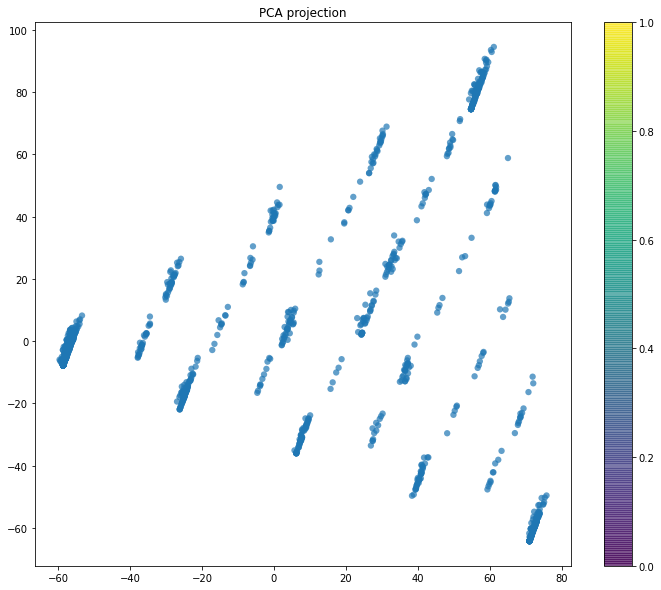

In [74]:
print('Projecting %d-dimensional data to 2D' % data_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

## **K-Means Algorithm with PCA**

**K-Means using PCA features**

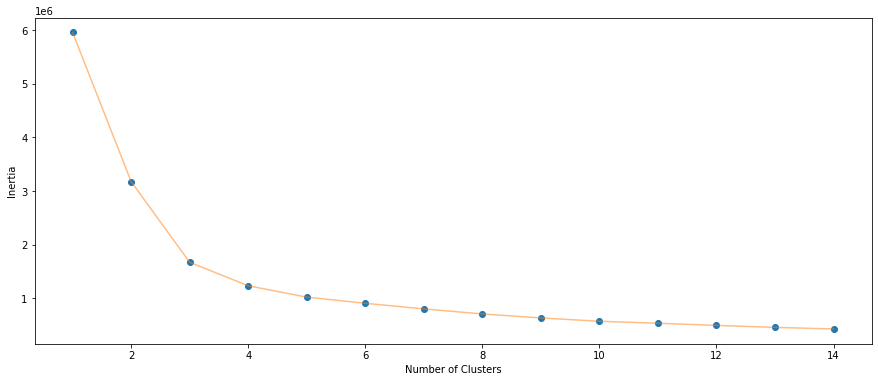

In [75]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [76]:
algorithm_pca = (KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm_pca.fit(principalDf)
labels_pca = algorithm_pca.labels_
centroids_pca = algorithm_pca.cluster_centers_

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(principalDf, labels_pca)

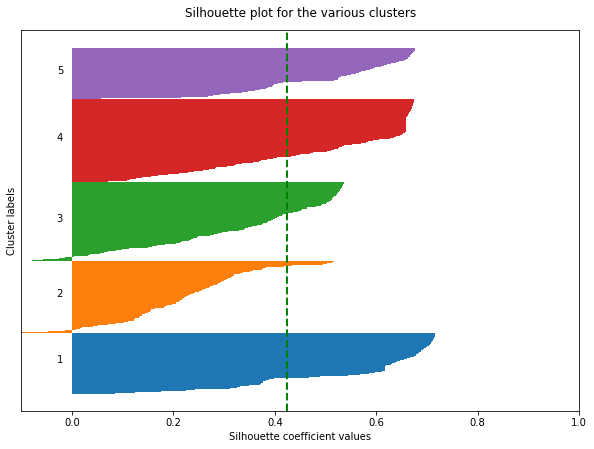

In [78]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_pca.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_pca)):
    cluster_silhouette_vals = silhouette_vals[labels_pca == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

## **K-Means Algorithm**

**K-Means using Direct Dataset**

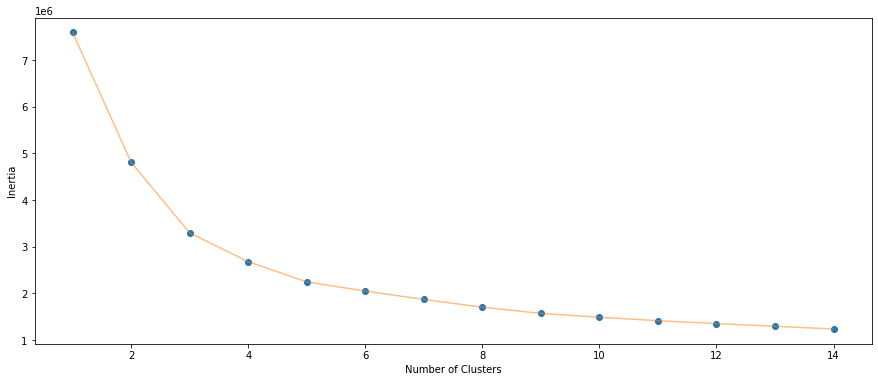

In [ ]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(usefulcoldata)
    wcss.append(km.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , wcss , 'o')
plt.plot(np.arange(1 , 15) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
# y_kmeans = kmeans.predict(data_scaled)
# plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

algorithm_data = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm_data.fit(usefulcoldata)
labels_data = algorithm_data.labels_
centroids_data = algorithm_data.cluster_centers_

# centroids_data

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(usefulcoldata, labels_data)
silhouette_vals

array([0.17474848, 0.18776781, 0.38968777, ..., 0.61850493, 0.61742046,
       0.42849102])

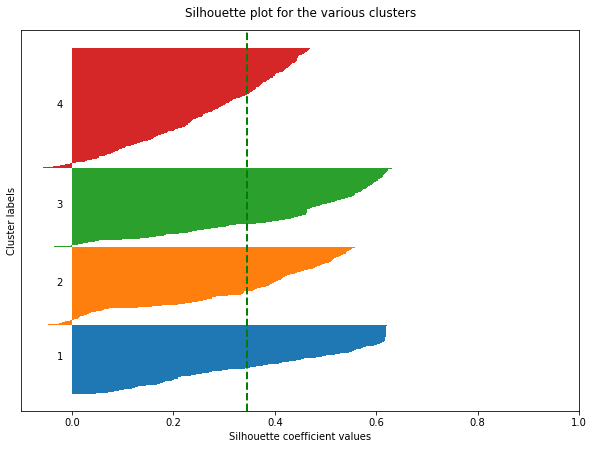

In [ ]:
# for i, k in enumerate([2, 3, 4]):
fig, ax1 = plt.subplots(1)
fig.set_size_inches(10, 7)

centroids = algorithm_data.cluster_centers_
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_data)):
    cluster_silhouette_vals = silhouette_vals[labels_data == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

## **Cluster Analysis for PCA K-Means**

In [79]:
new_frame = pd.DataFrame(usefulcoldata)
new_frame['clusters'] = algorithm_pca.predict(principalDf)
new_frame['team_id'] = complete_dataset['team_id']

In [91]:
new_frame.head()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
0,0.50,0.50,0.00,0.00,0.000000,1.00,0.00,0.00,0.00,0.0,...,100.0,0.0,0.0,0.0,34.375,0.555318,0.314919,3.925664,3,1001
1,0.25,0.75,0.00,0.00,0.000000,0.50,0.00,0.25,0.25,0.0,...,75.0,25.0,0.0,0.0,37.500,0.465137,0.329363,9.821698,2,1002
2,0.25,0.25,0.00,0.25,0.333333,0.00,0.00,0.25,0.75,0.0,...,25.0,0.0,75.0,0.0,50.000,0.641764,0.580730,39.270856,4,1004
3,0.00,0.50,0.25,0.25,0.000000,0.00,0.25,0.75,0.00,0.0,...,0.0,0.0,75.0,0.0,75.000,0.558520,0.659837,57.696714,4,1005
4,1.00,0.00,0.00,0.00,0.000000,0.75,0.25,0.00,0.00,0.0,...,75.0,25.0,0.0,0.0,62.500,0.569904,0.527888,64.584177,2,1006


In [81]:
list(np.unique(labels_pca))

[0, 1, 2, 3, 4]

In [82]:
# cluster_data = new_frame.loc[(new_frame['clusters'] == cluster_select)]
new_l = []
for label in list(np.unique(labels_pca)):
  cluster_frame = pd.DataFrame([])
  cluster_frame = new_frame.loc[(new_frame['clusters'] == label)]
  new_l.append(cluster_frame)

  


In [84]:
new_l[0].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.0,228.000000
mean,0.726974,0.201754,0.054825,0.010965,0.005848,0.614035,0.277412,0.093202,0.012061,0.002924,...,3.947368,92.434211,1.425439,0.0,28.906250,0.389693,0.317031,15.502077,0.0,2049.644737
std,0.346897,0.300288,0.174847,0.069536,0.069717,0.393561,0.337725,0.209436,0.075072,0.031151,...,9.136114,12.649809,5.809658,0.0,20.640252,0.221296,0.198366,16.203742,0.0,548.418914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1020.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,75.000000,0.000000,0.0,12.500000,0.242129,0.183103,3.291162,0.0,1570.250000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.0,25.000000,0.407062,0.317697,9.035057,0.0,2104.500000
75%,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.0,50.000000,0.553228,0.448491,23.342091,0.0,2559.750000
max,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,0.750000,0.333333,...,25.000000,100.000000,25.000000,0.0,87.500000,0.973675,0.945825,79.552952,0.0,2965.000000


In [85]:
new_l[1].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.0,268.000000
mean,0.606343,0.296642,0.058769,0.027985,0.003731,0.539179,0.311567,0.102612,0.034515,0.006219,...,31.529851,25.932836,19.402985,0.0,34.666511,0.472471,0.403475,20.801115,1.0,1887.481343
std,0.352063,0.298511,0.133547,0.117162,0.035135,0.362516,0.310455,0.178981,0.140134,0.067371,...,20.165306,20.619324,19.507463,0.0,20.211339,0.201407,0.195597,16.104846,0.0,540.707737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,1010.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,25.000000,0.000000,0.000000,0.0,18.750000,0.363883,0.262911,6.752875,1.0,1425.750000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,...,25.000000,25.000000,25.000000,0.0,37.500000,0.509783,0.412182,18.685990,1.0,1846.500000
75%,1.000000,0.500000,0.000000,0.000000,0.000000,0.812500,0.500000,0.250000,0.000000,0.000000,...,50.000000,50.000000,25.000000,0.0,50.000000,0.613750,0.530654,31.378397,1.0,2363.000000
max,1.000000,1.000000,0.750000,1.000000,0.333333,1.000000,1.000000,0.750000,1.000000,1.000000,...,50.000000,50.000000,50.000000,0.0,87.500000,0.830843,0.934936,75.959344,1.0,2964.000000


In [86]:
new_l[2].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.0,294.000000
mean,0.566327,0.304422,0.096088,0.030612,0.003401,0.488095,0.330782,0.130952,0.045068,0.006803,...,90.561224,4.676871,2.295918,0.0,45.960884,0.542078,0.468694,26.426033,2.0,1844.823129
std,0.377284,0.324638,0.196800,0.120075,0.033557,0.386784,0.314029,0.220210,0.135005,0.054656,...,13.785584,9.765912,7.232194,0.0,13.193795,0.146513,0.150952,15.949466,0.0,587.977452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.0,25.000000,0.000000,0.000000,0.000000,2.0,1002.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,75.000000,0.000000,0.000000,0.0,37.500000,0.456910,0.367895,14.563827,2.0,1333.500000
50%,0.500000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,43.750000,0.544112,0.457380,23.699341,2.0,1749.500000
75%,1.000000,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,50.000000,0.648746,0.564064,35.144601,2.0,2334.750000
max,1.000000,1.000000,1.000000,0.750000,0.333333,1.000000,1.000000,1.000000,1.000000,0.666667,...,100.000000,25.000000,25.000000,0.0,100.000000,1.000000,1.000000,90.677462,2.0,2963.000000


In [87]:
new_l[3].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,311.000000,311.000000,311.000000,311.000000,311.0,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.0,311.000000,311.000000,311.000000,311.000000,311.0,311.000000
mean,0.647106,0.291801,0.053859,0.006431,0.0,0.618971,0.294212,0.076367,0.008039,0.002144,...,95.257235,2.411576,0.723473,0.0,14.308682,0.281624,0.209212,6.486139,3.0,2048.073955
std,0.366247,0.335201,0.151980,0.056430,0.0,0.369603,0.322938,0.178468,0.048523,0.026688,...,10.220066,7.392524,4.197626,0.0,12.115846,0.213068,0.172210,7.183765,0.0,537.938410
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.0,1001.000000
25%,0.250000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,0.000000,0.065190,0.033954,0.230845,3.0,1613.000000
50%,0.750000,0.250000,0.000000,0.000000,0.0,0.750000,0.250000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,12.500000,0.284063,0.207013,4.389078,3.0,1987.000000
75%,1.000000,0.500000,0.000000,0.000000,0.0,1.000000,0.500000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.0,25.000000,0.453575,0.342096,9.336750,3.0,2532.000000
max,1.000000,1.000000,1.000000,0.750000,0.0,1.000000,1.000000,1.000000,0.500000,0.333333,...,100.000000,25.000000,25.000000,0.0,37.500000,0.890075,0.825874,34.942504,3.0,2971.000000


In [88]:
new_l[4].describe()

,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,sub_ip_4.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,team_id
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,...,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.0,192.000000
mean,0.575521,0.286458,0.121094,0.011719,0.005208,0.610677,0.247396,0.123698,0.016927,0.0,...,3.515625,2.604167,89.192708,0.0,35.579427,0.438617,0.383740,25.066709,4.0,1912.703125
std,0.380513,0.308007,0.237207,0.058834,0.041448,0.369559,0.287148,0.210952,0.085077,0.0,...,8.713579,7.656882,15.468236,0.0,23.667317,0.205897,0.207634,21.136592,0.0,554.615985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,50.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.0,1004.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,75.000000,0.0,12.500000,0.299404,0.247467,6.457535,4.0,1426.250000
50%,0.750000,0.250000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.0,...,0.000000,0.000000,100.000000,0.0,37.500000,0.487193,0.397693,21.020285,4.0,1882.500000
75%,1.000000,0.500000,0.250000,0.000000,0.000000,1.000000,0.500000,0.250000,0.000000,0.0,...,0.000000,0.000000,100.000000,0.0,50.000000,0.593783,0.523077,38.195120,4.0,2387.000000
max,1.000000,1.000000,1.000000,0.500000,0.333333,1.000000,1.000000,1.000000,0.750000,0.0,...,25.000000,25.000000,100.000000,0.0,100.000000,0.807542,0.900671,100.000000,4.0,2951.000000


## **Manual Labelling**

In [104]:
Model_dataset = complete_dataset.loc(axis=1)['team_id', 'sub_ros_0.0', 'sub_ros_1.0', 'sub_ros_2.0', 'sub_ros_3.0', 'sub_ros_4.0', 'sub_ip_0.0', 'sub_ip_1.0', 'sub_ip_2.0', 'sub_ip_3.0', 'sub_ip_4.0', 'sub_emb_c_0.0', 'sub_emb_c_1.0', 'sub_emb_c_2.0', 'sub_emb_c_3.0', 'sub_emb_c_4.0', 'sub_ml_0.0', 'sub_ml_1.0', 'sub_ml_2.0', 'sub_ml_3.0', 'sub_ml_4.0', 'sub_ap_0.0', 'sub_ap_1.0', 'sub_ap_2.0', 'sub_ap_3.0', 'sub_ap_4.0', 'sub_cs_0.0', 'sub_cs_1.0', 'sub_cs_2.0', 'sub_cs_3.0', 'sub_cs_4.0', 'sub_mss_0.0', 'sub_mss_1.0', 'sub_mss_2.0', 'sub_mss_3.0', 'sub_mss_4.0', 'sub_fpga_0.0', 'sub_fpga_1.0', 'sub_fpga_2.0', 'sub_fpga_3.0', 'sub_fpga_4.0', 'sub_mm_0.0', 'sub_mm_1.0', 'sub_mm_2.0', 'sub_mm_3.0', 'sub_mm_4.0', 'sub_de_0.0', 'sub_de_1.0', 'sub_de_2.0', 'sub_de_3.0', 'sub_de_4.0', 'Participation_Freq_0', 'Participation_Freq_1', 'Participation_Freq_2', 'Participation_Freq_3', 'Department_category_0.0', 'Department_category_1.0', 'Department_category_2.0', 'Department_category_3.0', 'Ram_Avg', 'SingleCore_Avg', 'MultiCore_Avg', 'GeekBench(OpenCL)_Avg']

In [105]:
Model_dataset['clusters'] = new_frame['clusters']

In [106]:
Model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1292
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team_id                  1293 non-null   int64  
 1   sub_ros_0.0              1293 non-null   int64  
 2   sub_ros_1.0              1293 non-null   int64  
 3   sub_ros_2.0              1293 non-null   int64  
 4   sub_ros_3.0              1293 non-null   int64  
 5   sub_ros_4.0              1293 non-null   int64  
 6   sub_ip_0.0               1293 non-null   int64  
 7   sub_ip_1.0               1293 non-null   int64  
 8   sub_ip_2.0               1293 non-null   int64  
 9   sub_ip_3.0               1293 non-null   int64  
 10  sub_ip_4.0               1293 non-null   int64  
 11  sub_emb_c_0.0            1293 non-null   int64  
 12  sub_emb_c_1.0            1293 non-null   int64  
 13  sub_emb_c_2.0            1293 non-null   int64  
 14  sub_emb_c_3.0           

In [107]:
Model_dataset.head()

,team_id,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,...,Participation_Freq_3,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters
0,1001,2,2,0,0,0,4,0,0,0,...,0,4,0,0,0,5.5,780.50,1771.50,2278.75,3
1,1002,1,3,0,0,0,2,0,1,1,...,0,3,1,0,0,6.0,653.75,1852.75,5701.25,2
2,1004,1,1,0,1,1,0,0,1,3,...,0,1,0,3,0,8.0,902.00,3266.75,22795.75,4
3,1005,0,2,1,1,0,0,1,3,0,...,0,0,0,3,1,12.0,785.00,3711.75,33491.50,4
4,1006,4,0,0,0,0,3,1,0,0,...,0,3,1,0,0,10.0,801.00,2969.50,37489.50,2


### **Creating Reference Dictionary**



```
Department_category = { 'Electronics' : 0,
                        'Computers' : 1, 
                        'Mechanical' : 2,
                        'Others' : 3,
                        }
```
```
Labels = { 'SS' : 0,
           'SM' : 1,
           'FW' : 2,
           'DB' : 3,
           'BM' : 4,
           'AB' : 5
}
```



### **Setting up labels from eyantra data**

In [108]:
Model_dataset[Model_dataset['team_id']==1066]

,team_id,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,...,Participation_Freq_3,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters
40,1066,4,0,0,0,0,2,2,0,0,...,0,0,4,0,0,6.0,792.75,2762.0,15610.75,0


In [109]:
Model_dataset["Labels"] = np.nan

In [110]:
Model_dataset.head()

,team_id,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,Labels
0,1001,2,2,0,0,0,4,0,0,0,...,4,0,0,0,5.5,780.50,1771.50,2278.75,3,NaN
1,1002,1,3,0,0,0,2,0,1,1,...,3,1,0,0,6.0,653.75,1852.75,5701.25,2,NaN
2,1004,1,1,0,1,1,0,0,1,3,...,1,0,3,0,8.0,902.00,3266.75,22795.75,4,NaN
3,1005,0,2,1,1,0,0,1,3,0,...,0,0,3,1,12.0,785.00,3711.75,33491.50,4,NaN
4,1006,4,0,0,0,0,3,1,0,0,...,3,1,0,0,10.0,801.00,2969.50,37489.50,2,NaN


In [111]:
Model_dataset['Labels'][Model_dataset['team_id']==1066] = 2
Model_dataset['Labels'][Model_dataset['team_id']==1410] = 2

Model_dataset['Labels'][Model_dataset['team_id']==1002] = 0
Model_dataset['Labels'][Model_dataset['team_id']==1126] = 0

Model_dataset['Labels'][Model_dataset['team_id']==2765] = 1
Model_dataset['Labels'][Model_dataset['team_id']==1332] = 1

Model_dataset['Labels'][Model_dataset['team_id']==1341] = 3
Model_dataset['Labels'][Model_dataset['team_id']==1245] = 3

Model_dataset['Labels'][Model_dataset['team_id']==1067] = 4
Model_dataset['Labels'][Model_dataset['team_id']==1211] = 4

Model_dataset['Labels'][Model_dataset['team_id']==1214] = 5
Model_dataset['Labels'][Model_dataset['team_id']==1233] = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying t

In [112]:
Model_dataset['Labels'].replace(np.nan, -1, inplace=True)

In [113]:
Model_dataset[Model_dataset['Labels']!=-1]

,team_id,sub_ros_0.0,sub_ros_1.0,sub_ros_2.0,sub_ros_3.0,sub_ros_4.0,sub_ip_0.0,sub_ip_1.0,sub_ip_2.0,sub_ip_3.0,...,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_3.0,Ram_Avg,SingleCore_Avg,MultiCore_Avg,GeekBench(OpenCL)_Avg,clusters,Labels
1,1002,1,3,0,0,0,2,0,1,1,...,3,1,0,0,6.0,653.75,1852.75,5701.25,2,0.0
40,1066,4,0,0,0,0,2,2,0,0,...,0,4,0,0,6.0,792.75,2762.00,15610.75,0,2.0
41,1067,2,1,1,0,0,1,1,2,0,...,0,0,4,0,8.0,878.75,3178.00,16519.75,4,4.0
71,1126,2,0,2,0,0,1,1,2,0,...,3,1,0,0,8.0,690.50,2504.00,11972.25,2,0.0
117,1211,1,3,0,0,0,0,3,1,0,...,2,0,0,2,8.0,897.50,3640.50,15825.75,2,4.0
120,1214,0,1,3,0,0,0,1,3,0,...,0,1,3,0,9.0,766.25,2920.75,13006.25,4,5.0
135,1233,3,0,1,0,0,2,1,1,0,...,0,4,0,0,0.0,799.25,2660.50,6373.25,0,5.0
142,1245,0,3,1,0,0,0,1,3,0,...,0,0,3,1,8.0,935.00,3098.75,20590.25,4,3.0
214,1332,2,2,0,0,0,4,0,0,0,...,4,0,0,0,11.0,812.25,3426.75,10656.00,2,1.0
222,1341,3,1,0,0,0,3,0,1,0,...,1,0,3,0,10.0,1087.50,4336.75,23892.00,4,3.0


### **Implement SSL for the rest of the dataset**